In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

In [11]:
# Load the Wine Quality dataset with the correct delimiter (',' in this case)
wine_data = pd.read_csv('winequality-red.csv', sep=',')

In [9]:
print(wine_data.columns)

Index(['fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality'], dtype='object')


In [12]:
# Data preprocessing
X = wine_data.drop('quality', axis=1)  # Features
y = wine_data['quality']  # Target variable


In [13]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Initialize and train the Naive Bayes classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [15]:
# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

In [16]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)


In [17]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.55
Precision: 0.5423266539440204
Recall: 0.55
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.10      0.12        10
           5       0.65      0.65      0.65       130
           6       0.53      0.52      0.52       132
           7       0.43      0.50      0.46        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.30      0.30      0.29       320
weighted avg       0.54      0.55      0.55       320



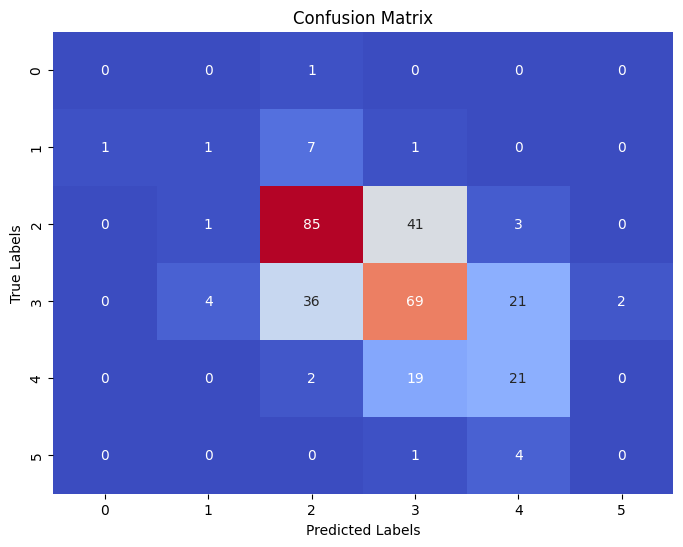

In [18]:
# Plot the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()